## 1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Plotting f1 f2 f3:


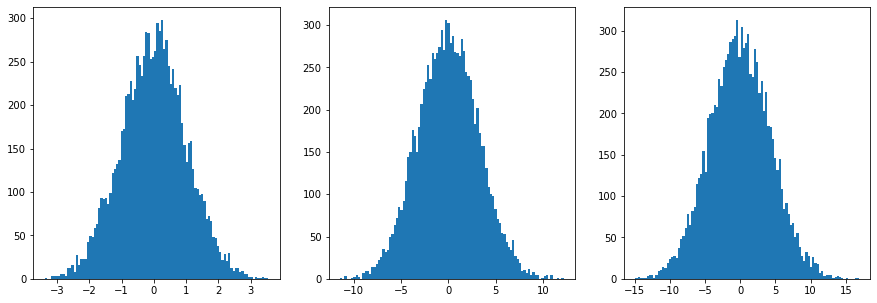

Create a matrix and find convariance matrix:


Eigenvalue: 27.772218554214152  ,	eigenvector: [-0.11571589 -0.5770429  -0.80847469]
Eigenvalue: 1.038268051856895e-15  ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
Eigenvalue: 2.000463532017352  ,	eigenvector: [ 0.56563519 -0.70735763  0.42391274]


In [13]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt


entries=10000
f1=np.random.normal(loc=0.0, scale=1.0, size=entries)
f2=f1+np.random.normal(loc=0.0, scale=3.0, size=entries)
f3=2*f1+f2

print("Plotting f1 f2 f3:")
fig, axs = plt.subplots(1,3,figsize=(15,5))
n_bins=100
axs[0].hist(f1, bins=n_bins)
axs[1].hist(f2, bins=n_bins)
axs[2].hist(f3, bins=n_bins)
plt.show()

#IMPORTANTE BISOGNA CENTRARLI OPPURE NO?? non cambia tanto sono già centrati
#center the array in 0
#f1=f1-f1.mean()
#f2=f2-f2.mean()
#f3=f3-f3.mean()

#create a matrix and find convariance matrix

print("Create a matrix and find convariance matrix:\n\n")
M=np.array([f1,f2,f3])
cov = np.cov(M)


l, V = la.eig(cov)
l = np.real_if_close(l)

for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, " ,\teigenvector:", vi)
    
    
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde



In [14]:
#using SVD
U, S, Vt = np.linalg.svd(M)
l_svd = S**2/(entries-1)
print(l_svd,"\nsame eigenvalues found above \n")
V_svd = U
print(U,"\neigenvectors are the columns of the U matrix (eventually with a minus sign)")

[2.77733252e+01 2.00050935e+00 9.43430813e-32] 
same eigenvalues found above 

[[-0.11571095  0.5656362  -0.81649658]
 [-0.57704908 -0.70735259 -0.40824829]
 [-0.80847098  0.42391981  0.40824829]] 
eigenvectors are the columns of the U matrix (eventually with a minus sign)


In [15]:
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')
print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0,0]/Lambda.trace()*100))
print("By selecting the component 1, we retain %.0d%% of the total variability" % (Lambda[1,1]/Lambda.trace()*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2,2]/Lambda.trace()*100))

print("principal components are the first and third.\nwe expected since the second and the third are not independent")
#, which are given by sum of two gaussians while the first one has a smaller dispersion and is given by a single gaussian
print("Reducing the dimensionality to 2<3 we get %.2f%%"% ((Lambda[0,0]+Lambda[2,2])/Lambda.trace()*100))

Lambda:
 [[2.77722186e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.03826805e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.00046353e+00]] 

Trace(A):
 29.77268208623149 

Trace(Lambda):
 29.772682086231505 

By selecting the component 0, we retain 93.28% of the total variability
By selecting the component 1, we retain 0% of the total variability
By selecting the component 2, we retain 6.72% of the total variability
principal components are the first and third.
we expected since the second and the third are not independent
Reducing the dimensionality to 2<3 we get 100.00%


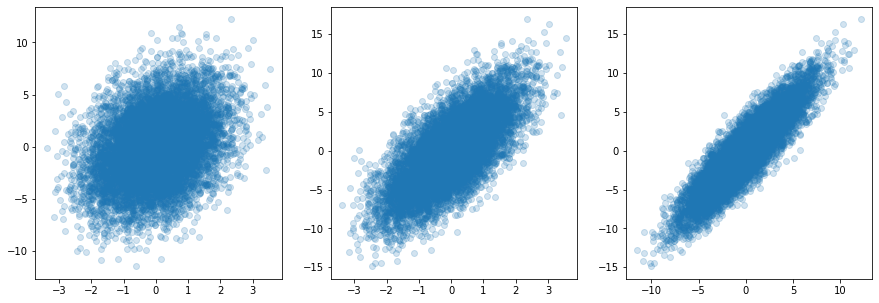

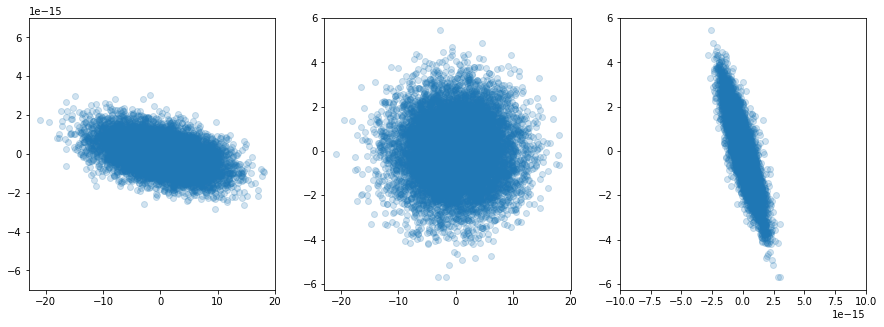

In [16]:
#Redefine the data according to the new basis from the PCA


fig, axso = plt.subplots(1,3,figsize=(15,5))
axso[0].scatter(M[0], M[1], alpha=0.2)
axso[1].scatter(M[0], M[2], alpha=0.2)
axso[2].scatter(M[1], M[2], alpha=0.2)
#axs[1].imshow(radius, norm=LogNorm(vmin=2))
plt.show()

Mp = np.dot(V.T, M)
fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].scatter(Mp[0], Mp[1], alpha=0.2)
axs[0].set_ylim(-7*10**-15,7*10**-15)
axs[1].scatter(Mp[0], Mp[2], alpha=0.2)
axs[2].scatter(Mp[1], Mp[2], alpha=0.2)
axs[2].set_xlim(-10**-14,10**-14)
plt.show()



## 2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Plotting f1 f2b f3b:


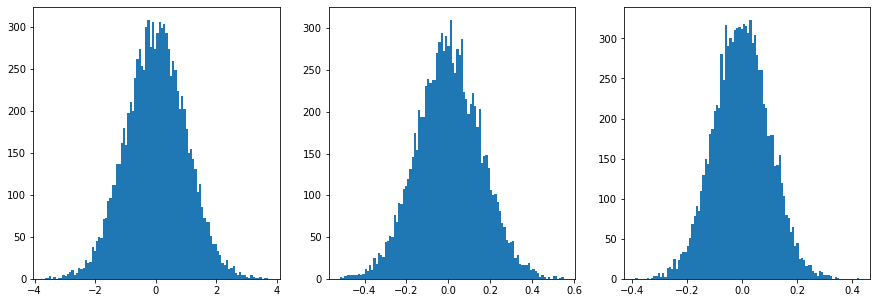

Create a matrix and find convariance matrix:


Eigenvalue: 26.87314425015769 

Eigenvalue: 1.9609681819839953 

Eigenvalue: 0.02325425800769127 

Eigenvalue: 0.01009046693818578 

Eigenvalue: 0.009843621493681563 

Eigenvalue: 9.03017278580483e-16 

Eigenvalue: 0.0062318086267483825 

Eigenvalue: 0.0009041325509605601 

Eigenvalue: 0.0025622928537922607 

Eigenvalue: 0.002515464209872349 

Eigenvalue: 0.0024858799531578654 

Eigenvalue: 0.0024389234295883557 

Eigenvalue: 0.0024162047083562026 



In [17]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt


entries=10000
f1=np.random.normal(loc=0.0, scale=1.0, size=entries)
f2=f1+np.random.normal(loc=0.0, scale=3.0, size=entries)
f3=2*f1+f2
f1b=np.random.normal(loc=0.0, scale=.05, size=entries)
f2b=np.random.normal(loc=0.0, scale=.15, size=entries)
f3b=np.random.normal(loc=0.0, scale=.10, size=entries)
f4b=np.random.normal(loc=0.0, scale=.05, size=entries)
f5b=np.random.normal(loc=0.0, scale=.05, size=entries)
f6b=np.random.normal(loc=0.0, scale=.10, size=entries)
f7b=np.random.normal(loc=0.0, scale=.03, size=entries)
f8b=np.random.normal(loc=0.0, scale=.05, size=entries)
f9b=np.random.normal(loc=0.0, scale=.08, size=entries)
f10b=np.random.normal(loc=0.0, scale=.05, size=entries)

print("Plotting f1 f2b f3b:")
fig, axs = plt.subplots(1,3,figsize=(15,5))
n_bins=100
axs[0].hist(f1, bins=n_bins)
axs[1].hist(f2b, bins=n_bins)
axs[2].hist(f3b, bins=n_bins)
plt.show()


#create a matrix and find convariance matrix

print("Create a matrix and find convariance matrix:\n\n")

M=np.array([f1,f2,f3,f1b,f2b,f3b,f4b,f5b,f6b,f7b,f8b,f9b,f10b])
cov = np.cov(M)

#print(cov)
#cov = np.dot(M, M.T)/(entries-1) # this would yield the same result
#print(cov)

#eigenvalues (only real if close) and eigenvectors
l, V = la.eig(cov)
l = np.real_if_close(l)

for li, vi in zip(l, V.T):
    print("Eigenvalue:", li,"\n")
    


In [18]:
#using SVD
U, S, Vt = np.linalg.svd(M)
l_svd = S**2/(entries-1)
print(l_svd,"\nsame eigenvalues found above \n")
V_svd = U
#print(U,"\neigenvectors are the columns of the U matrix (eventually with a minus sign)")

Lambda = np.diag(l)
#print("Lambda:\n", Lambda, '\n')
#print("Trace(A):\n", cov.trace(), '\n')
#print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0,0]/Lambda.trace()*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % (Lambda[1,1]/Lambda.trace()*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % (Lambda[2,2]/Lambda.trace()*100))
for i in range(1,11):
    print('By selecting the component %1db, we retain %.2f%% of the total variability' %(i, Lambda[i+2,i+2]/Lambda.trace()*100))

print("\nNone of the new ten variables has a non negligible variability.")
print("Reducing the dimensionality to 2<13 we get %.2f%% of the total variability"% ((Lambda[0,0]+Lambda[1,1])/Lambda.trace()*100))



[2.68749348e+01 1.96098468e+00 2.32572124e-02 1.00913011e-02
 9.84409801e-03 6.23183699e-03 2.56244918e-03 2.51573989e-03
 2.48588965e-03 2.43892950e-03 2.41639676e-03 9.05087969e-04
 7.26947024e-32] 
same eigenvalues found above 

By selecting the component 0, we retain 93.00% of the total variability
By selecting the component 1, we retain 6.79% of the total variability
By selecting the component 2, we retain 0.08% of the total variability
By selecting the component 1b, we retain 0.03% of the total variability
By selecting the component 2b, we retain 0.03% of the total variability
By selecting the component 3b, we retain 0.00% of the total variability
By selecting the component 4b, we retain 0.02% of the total variability
By selecting the component 5b, we retain 0.00% of the total variability
By selecting the component 6b, we retain 0.01% of the total variability
By selecting the component 7b, we retain 0.01% of the total variability
By selecting the component 8b, we retain 0.01% of 

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [19]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [20]:
import csv

n = 0
ar1=np.array([])
ar2=np.array([])
ar3=np.array([])
ar4=np.array([])
ar5=np.array([])
ar6=np.array([])
ar7=np.array([])
ar8=np.array([])
ar9=np.array([])
ar10=np.array([])




with open('data/magic04.data') as data_file:     #open it and loop on the lines:
    for line in csv.reader(data_file, delimiter=','): # the delimiter is often guessed by the reader
        fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist = map(float, line[:-1])
        
        category = line[-1]  #line[-1] è l'ultimo elemento della riga
        #print(fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist, category)
        ar1=np.append(ar1,fLength)
        ar2=np.append(ar2,fWidth)
        ar3=np.append(ar3,fSize)
        ar4=np.append(ar4,fConc)
        ar5=np.append(ar5,fConc1)
        ar6=np.append(ar6,fAsym)
        ar7=np.append(ar7,fM3Long)
        ar8=np.append(ar8,fM3Trans)
        ar9=np.append(ar9,fAlpha)
        ar10=np.append(ar10,fDist)
        
        
        n += 1
        #if n > 10: break
X=np.array([ar1,ar2,ar3,ar4,ar5,ar6,ar7,ar8,ar9,ar10])

Plotting f1 f2 f3:


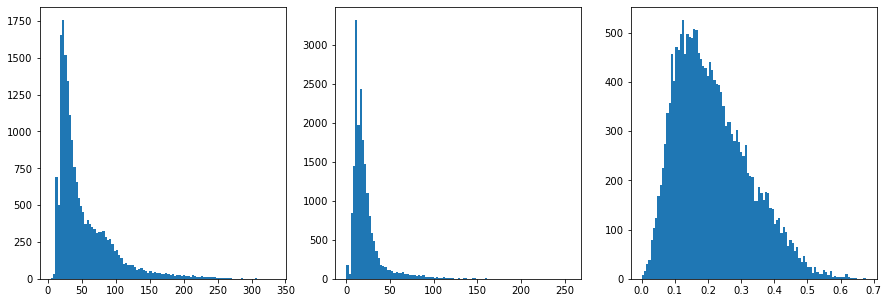

In [21]:

#print(ar_flength)
print("Plotting f1 f2 f3:")
fig, axs = plt.subplots(1,3,figsize=(15,5))
n_bins=100
axs[0].hist(ar1, bins=n_bins)
axs[1].hist(ar2, bins=n_bins)
axs[2].hist(ar5, bins=n_bins)
plt.show()


#center the array in 0
for i in range(0,10):
    X[i]=X[i]-X[i].mean()

#create a matrix and find convariance matrix
cov_matrix = np.cov(X)


#eigenvalues (only real if close) and eigenvectors
l, V = la.eig(cov_matrix)
l = np.real_if_close(l)


In [22]:
#using SVD
U, S, Vt = np.linalg.svd(X)
l_svd = S**2/(entries-1)
print(l_svd,"\nsame eigenvalues found above \n")
V_svd = U

Lambda = np.diag(l)
for i in range(0,10):
    print('By selecting the component %1db, we retain %.2f%% of the total variability' %(i, Lambda[i,i]/Lambda.trace()*100))


print("Reducing the dimensionality to 6<10 we get %.2f%% of the total variability"% ((Lambda[0,0]+Lambda[1,1]+Lambda[3,3]+Lambda[4,4]+Lambda[5,5]+Lambda[2,2])/Lambda.trace()*100))

[1.25153568e+04 7.33040931e+03 3.83534261e+03 2.52361659e+03
 1.16063121e+03 8.24744738e+02 2.23172385e+02 1.64334093e-01
 2.04215731e-02 7.32918837e-04] 
same eigenvalues found above 

By selecting the component 0b, we retain 44.05% of the total variability
By selecting the component 1b, we retain 25.80% of the total variability
By selecting the component 2b, we retain 13.50% of the total variability
By selecting the component 3b, we retain 8.88% of the total variability
By selecting the component 4b, we retain 4.08% of the total variability
By selecting the component 5b, we retain 2.90% of the total variability
By selecting the component 6b, we retain 0.79% of the total variability
By selecting the component 7b, we retain 0.00% of the total variability
By selecting the component 8b, we retain 0.00% of the total variability
By selecting the component 9b, we retain 0.00% of the total variability
Reducing the dimensionality to 6<10 we get 99.21% of the total variability
